# Comparison Tests of Uniswap and Hydra

## Model Structure
The methodology for the tests is to create two universes - one for Hydra and one for Uniswap - to subsequently be able to represent sequences of actions on each side. As the Hydra system is unique in its design and has no counterpart yet for approprate comparisons the role of the benchmark will be fulfilled by assembling several Uniswaps together in a way that everything that can be done in Hydra can be accordingly reproduced. This allows next to compare the implications on both systems and ultimately assess the quantitative and qualitative differences of results and impacts on the Hydra system and its agents. 

This approach necessitates the definition and specification of two models:
   - 1 Hydra Omnipool model with one instance that is defined in line with the Mathematical Specification
   - 1 Uniswap model with 3 instances that each are responsible for a particular trading pair
        - one instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - one instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - one instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
![](https://i.imgur.com/yb6Zh3T.png)

## Test agents

The model specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

Two dataframes of agents are initialized identically for both the Uniswap and the Hydra world and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

![](https://i.imgur.com/r9IAJMr.png)

## Model File Structure

![](https://i.imgur.com/mNhfQE4.png)


## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)
# rdf = df # debugging substeps


running file: run.py
running file: asset_utils.py
end of file: asset_utils.py
running file: sim_setup.py
end of file: sim_setup.py
end of file: run.py

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 15, 1, 24)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'purchased_asset_id': 'i'}
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_fo

{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'purchased_asset_id': 'i'}
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'purchased_asset_id': 'i'}
 R to R swap called 
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'purchased_asset_id': 'j'}
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'purchased_asset_id': 'j'}
 R to R swap called 
{'q_sold': 0, 'ri_sold': 0, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 

## Interpretation of Results

### Creation of Results

Before moving to the interpretation and analysis we first create and prepare the results: sometimes just to see whether the experiment is running corectly and sometimes to see into the results for analysis

The following command lines creates views based on the simulation results.

- the `model_history`, counting for the i-th base asset, the risk asset and the shares of the risk asset respectively.
- the `uniswap_j`, counting for the j-th base asset, the risk asset and the shares of the risk asset respectively.,
- the `uniswap_ij` counting for the i-j asset, the risk asset and the shares of the risk asset respectively, and
- `hydra`, counting the base asset amount in the pool, the total base asset supply and the shares of the base asset respectively.



In [2]:
model_history = rdf[['UNI_Qi', 'UNI_Ri', 'UNI_Si']]
model_history.columns = ['model_UNI_Qi', 'model_UNI_Ri', 'model_UNI_Si']

uniswap_j = rdf[['UNI_Qj', 'UNI_Rj', 'UNI_Sj']]
uniswap_j.columns = ['UNI_Qj', 'UNI_Rj', 'UNI_Sj']

uniswap_ij = rdf[['UNI_ij', 'UNI_ji', 'UNI_Sij']]
uniswap_ij.columns = ['UNI_ij', 'UNI_ji', 'UNI_Sij']

hydra = rdf[['Q', 'H', 'Sq']]
hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

### Risk assets in the Omnipool - the `pool` variable 

The `pool` variable is the risk-asset side of the Omnipool in the Hydra world.

For each asset in the Omnipool this variable tracks its quantities:

- $R$ (asset quantity),
- $S$ (share quantity),
- $C$ (coefficient),
- $P$ (price) and 
- $dP$ (change in price).

To locate specific values in the `pool` dataframe 
- `first_valid_index()`
- `first_valid_index()*x`
- `last_valid_index()`

can be used for any integer value $x$.

In [3]:
print(rdf.pool[rdf.first_valid_index()])

<class 'model.parts.v2_asset_utils.V2_Asset'>: {'pool': {'i': {'R': 1000000, 'S': 1000000, 'C': 1, 'P': 2.0, 'dP': 0.0}, 'j': {'R': 1000000, 'S': 1000000, 'C': 1.0, 'P': 2.0, 'dP': 0.0}}}


In [4]:
rdf.pool[rdf.first_valid_index()].pool

{'i': {'R': 1000000, 'S': 1000000, 'C': 1, 'P': 2.0, 'dP': 0.0},
 'j': {'R': 1000000, 'S': 1000000, 'C': 1.0, 'P': 2.0, 'dP': 0.0}}

In [5]:
rdf.pool[rdf.first_valid_index()*10].pool

{'i': {'R': 1050000, 'S': 1050000.0, 'C': 1.1025, 'P': 2.0, 'dP': 0.0},
 'j': {'R': 1000000, 'S': 1000000, 'C': 1.0, 'P': 2.0, 'dP': 0.0}}

In [6]:
rdf.pool[rdf.last_valid_index()].pool

{'i': {'R': 1000000.0,
  'S': 1000000.0,
  'C': 1.0,
  'P': 1.9999999999999998,
  'dP': 0.0},
 'j': {'R': 1000000,
  'S': 1000000,
  'C': 1.0,
  'P': 1.9999999999999998,
  'dP': 0.0}}

### Representing results in table form

In [7]:
rdf.columns


Index(['UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj', 'UNI_ij',
       'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj', 'UNI_P_ij',
       'pool', 'Q', 'H', 'Sq', 'Y', 'hydra_agents', 'C', 'asset_random_choice',
       'trade_random_size', 'trade_random_direction', 'purchased_asset_id',
       'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')

The simulation results and variable quantities can be shown in table form where

- `head(n)`
- `tail(n)`

can be used to target the $n$ specific entries.

##### The columns show:
##### for the uniswap universe
- `UNI_Qi`...the quantity of the i-th assets base
- `UNI_Ri`...the quantity of the i-th assets risk
- `UNI_Si`...the quantity of the i-th assets shares
- `UNI_Qj`...the quantity of the j-th assets base
- `UNI_Rj`...the quantity of the j-th assets risk
- `UNI_Sj`...the quantity of the j-th assets shares
- `UNI_ij`...the quantity of the ji assets base
- `UNI_ji`...the quantity of the ij assets risk
- `UNI_Sij`...the quantity of the ij assets shares
- `uni_agents`...the definition of the actions of the uniswap agents
- `UNI_P_RQi`...the price of the i-th risk asset in terms of Q
- `UNI_P_RQj`...the price of the j-th risk asset in terms of Q
- `UNI_P_RQj`...the price of the ij risk asset in terms of Q

##### for the hydra universe
- `pool`...the definition of the pool variable
- `Q`...the quantity of the base asset in the hydra pool
- `H`...the total quantity of the base asset in the hydra system
- `Sq`...total quantity of shares of the base asset
- `Y`...the pool constant
- `hydra_agents`...the definition of the actions of the hydra agents

##### for the trades
- `asset_random_choice`...which risk asset is traded in and which out
- `trade_random_size`...the size of the trade
- `trade_random_direction`...the trade action
- `purchased_asset_id`...which asset is purchased

##### simulation parameters
- `simulation`...simulation number
- `subset`...subset number
- `run`...run number
- `substep`...substep number
- `timestep`...timestep of simulation

Notice, that due to postprocessing of the simulation results this table always shows the forth substep of each timestep only.

In [8]:
rdf.tail()

,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,uni_agents,...,C,asset_random_choice,trade_random_size,trade_random_direction,purchased_asset_id,simulation,subset,run,substep,timestep
384,2000001.00,1000000.00,10000.00,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,j,0,test_r_for_r,i,0,0,1,4,96
388,2000001.00,1000000.00,10000.00,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,j,0,test_r_for_r,i,0,0,1,4,97
392,2000001.00,1000000.00,10000.00,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,0,test_r_for_r,j,0,0,1,4,98
396,2000001.00,1000000.00,10000.00,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,0,test_r_for_r,j,0,0,1,4,99
400,2000001.00,1000000.00,10000.00,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,0,test_r_for_r,j,0,0,1,4,100


# Uniswap Universe

## Global State variables for the Uniswap world
## i - Q instance
### Quantities of i-th risk asset, the Q asset and the i-asset shares

The following command lines **create three plots** that show: (for the i-th asset)
- on the left: the quantity of base asset `model_UNI_Qi` 
- center: the quantity of risk asset `model_UNI_Ri` 
- on the right: the quantity of shares `model_UNI_Si`
over all simulation steps

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

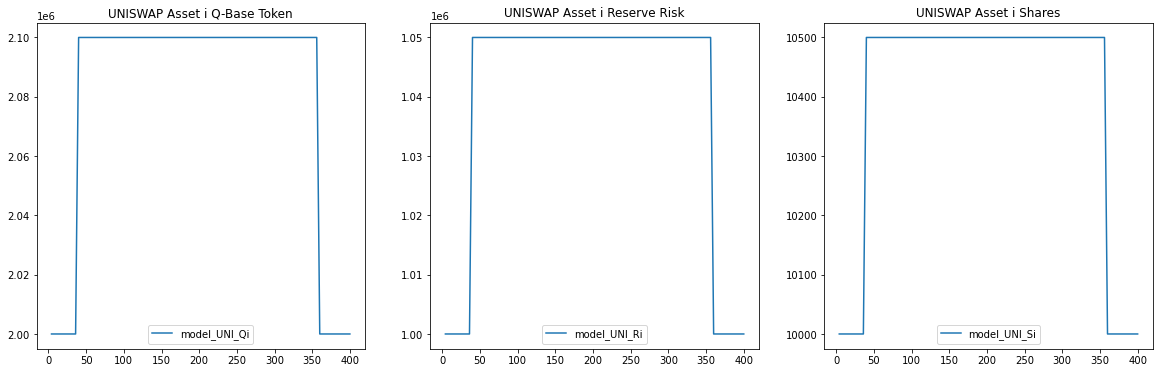

In [9]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Qi'])
plt.title('UNISWAP Asset i Q-Base Token')

ax = plt.subplot(132)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Ri'])
plt.title('UNISWAP Asset i Reserve Risk')

ax = plt.subplot(133)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Si'])
plt.title('UNISWAP Asset i Shares')
plt.show()

### Prices of the i-th asset

The following command line creates a plot of the prices: (for the i-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

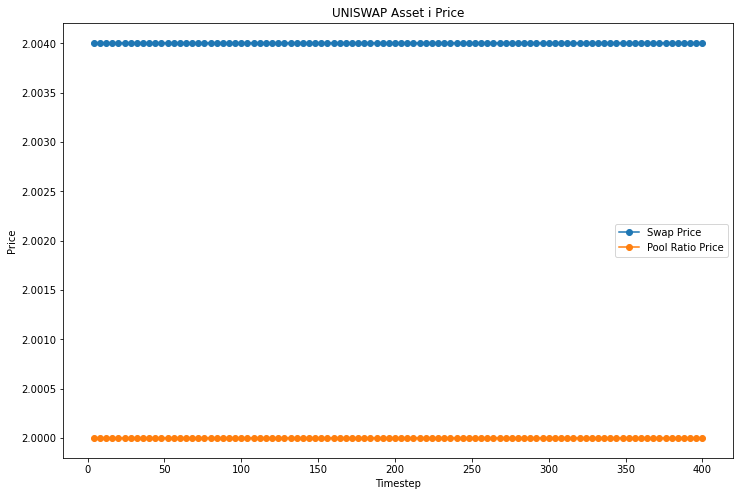

In [10]:
price_plot(rdf,'UNISWAP Asset i Price', 'UNI_P_RQi', 'UNI_Ri', 'UNI_Qi')

## j - Q instance
### Quantities of j-th risk asset, the Q asset and the j-asset shares


The following command lines create three plots that show: (for the j-th asset)
- on the left: the quantity of base asset `UNI_Qj` 
- center: the quantity of risk asset `UNI_Rj`
- on the right: the quantity of shares `UNI_Sj`

over the simulation steps

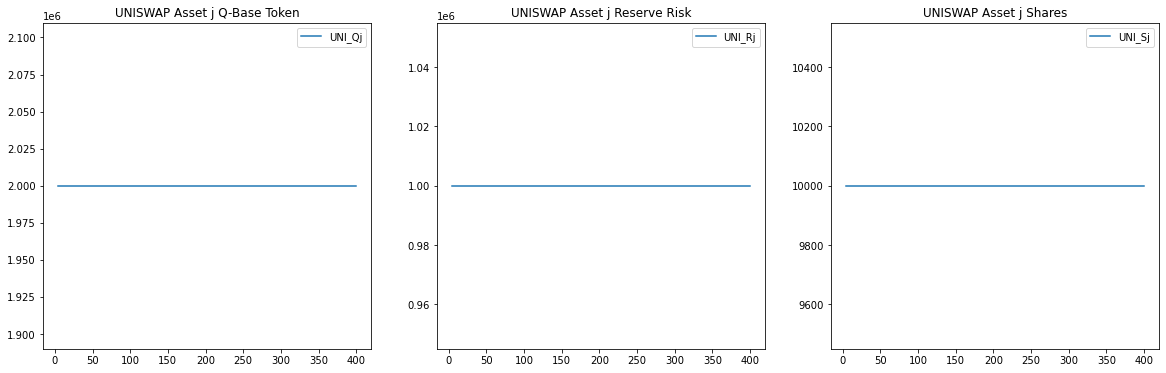

In [11]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Qj'])
plt.title('UNISWAP Asset j Q-Base Token')

ax = plt.subplot(132)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Rj'])
plt.title('UNISWAP Asset j Reserve Risk')

ax = plt.subplot(133)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Sj'])
plt.title('UNISWAP Asset j Shares')
plt.show()

### Prices of the j-th asset

The following command line creates a plot of the prices: (for the j-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.

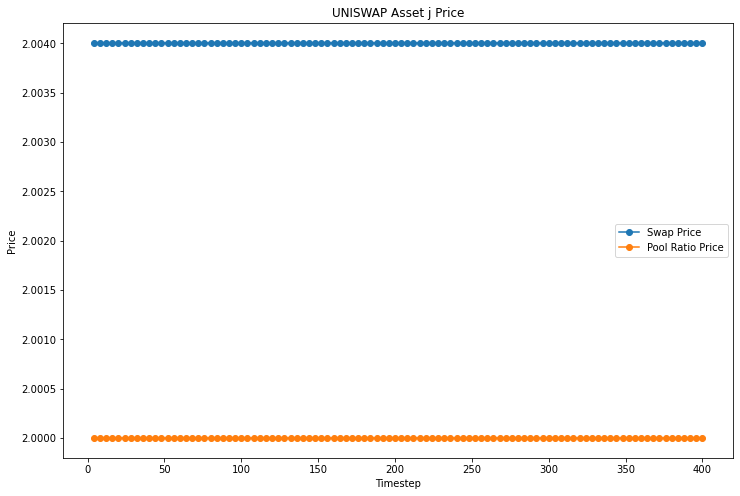

In [12]:
price_plot(rdf,'UNISWAP Asset j Price', 'UNI_P_RQj', 'UNI_Rj', 'UNI_Qj')

## i-j instance
### Quantities of i-th risk asset, the j-th risk asset and the i-j-asset shares


The following command lines create three plots that show: (for the j-th asset)
- on the left: the quantity of the i-th asset `UNI_ij` 
- center: the quantity of the j-th asset `UNI_ji`
- on the right: the quantity of i-j-shares `UNI_Sij`

over the simulation steps

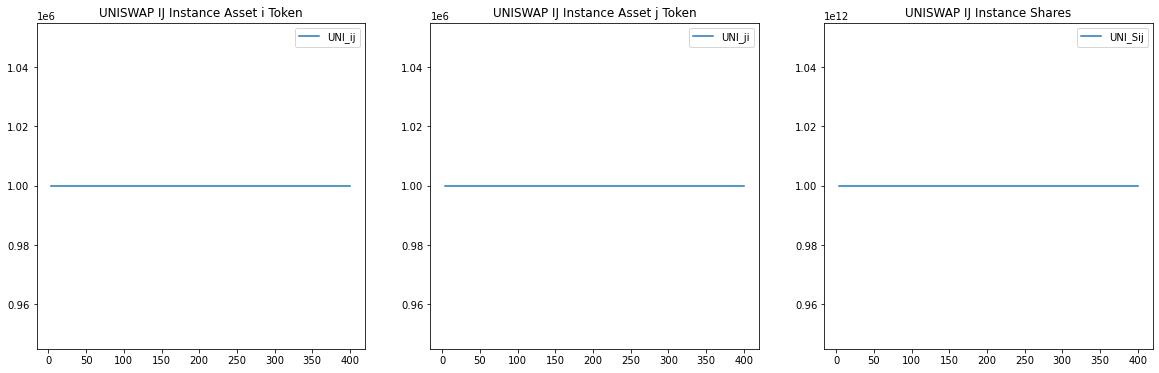

In [13]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_ij'])
plt.title('UNISWAP IJ Instance Asset i Token')

ax = plt.subplot(132)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_ji'])
plt.title('UNISWAP IJ Instance Asset j Token')

ax = plt.subplot(133)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_Sij'])
plt.title('UNISWAP IJ Instance Shares')
plt.show()

### Prices of the i-j asset swap

The following command line creates a plot of the swap prices
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

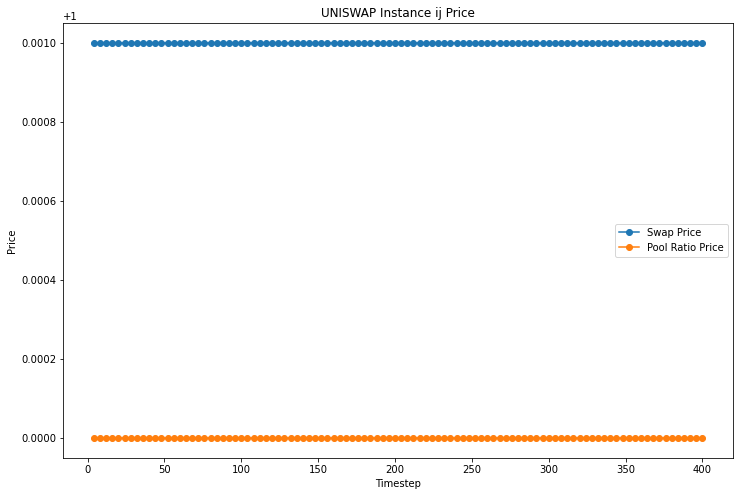

In [14]:
price_plot(rdf,'UNISWAP Instance ij Price', 'UNI_P_ij', 'UNI_ji','UNI_ij' )

# Hydra Universe


## Global State Variables for Hydra instance

The Hydra system state can be described with the following global variables:

| Symbol | Name | Definition  | Domain |  | Unit | | 
| --------|------- | -------- | -------- | -------- | -------- |-------|
| $H$     | HDX Total Supply     | Supply is the total quantity of the native protocol token (HDX).|  ${\mathbb{R}_{++}}$| | HDX; an amount in real positive numbers
| $Q$     | Base Pool Liquidity     | Base Pool Liquidity is the total quantity of the base asset (HDX) inside Pool.|  ${\mathbb{R}_{+}}$| | HDX; a positive real number if a pool has at least one risk asset
| $\mathbf{\vec{R}}$ | Reserve Risk Assets     | An $n$-dimensional vector whose components are quantities of risk assets provided to the Liquidity Pool by liquidity providers.      |  $\mathbb{R}_{++}^{n}$ | | BTC, ETH, DOT,...; a vector of real positive numbers denoting quantities of each asset in the pool.
| $\mathbf{\vec{S}}$     | Asset Shares     | Asset Shares are non-normalized values of each risk asset in the pool which are minted and distributed to the liquidity providers at time of inception of their asset into the Liquidity Pool. |  $\mathbb{R}_{++}^{n}$ | | a vector of real positive numbers
| $S^Q$     | Base Pool Share     | The Pool value share of the base asset (HDX), i.e. claims on $Q$.|  $\mathbb{R}_{+}$ | | HDX; a real positive number if there exists at least one risk asset in the pool
| $\mathbf{{P}}$     | Price    | The Price is a (n+1)x(n+1) Matrix listing all spot prices for all risk assets present in the Liquidity pool. Its components $p_{i,j}$ are the prices of the i-th asset denoted in the j-th asset.| $\mathbb{R}_{++}^{n\times n}$ | | f.e: ETH/HDX; depending on the component $p_{ij}$ of the matrix the unit is currency$_i$ / currency$_j$ where for the above example $i$ is ETH and $j$ is HDX. |
| $\vec{p}^Q$     | Asset Base Price    | The Asset Base Price is a vector listing the spot prices of all risk assets in the pool in terms of the base asset HDX. | $\mathbb{R}^n_{++}$ | | A real number representing the rate of exchange between a risk asset and HDX, e.g. ETH/HDX. |


Notice that $H$, $Q$ and $S^Q$ represent the Base side of the Omnipool and are tracked separately in the Hydra World whereas the other variables representing the Risk side of the Omnipool are encoded in $\mathbf{\vec{R}}$ , $\mathbf{\vec{S}}$  are tracked by the `pool` variable

## Hydra World
### Base Asset side of the Omnipool
### Quantities of the base asset in the pool and in the system, and the base-shares

The following command lines create three plots that show: (for the base asset)
- on the left: the quantity of base asset in the pool `Hydra_Q` 
- center: the total quantity of base asset in the system `Hydra_H` 
- on the right: the quantity of base asset shares `Hydra_Sq`

over the simulation steps

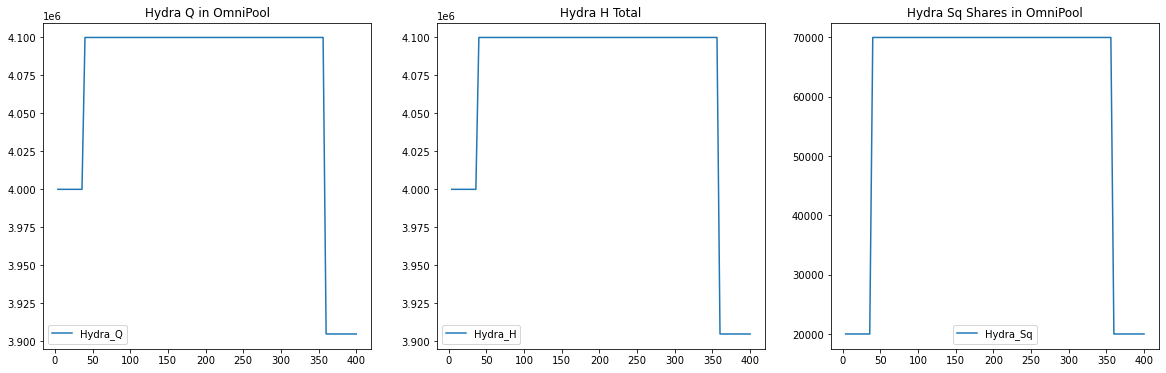

In [15]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
hydra.astype(float).plot(ax=ax, y=['Hydra_Q'])
plt.title('Hydra Q in OmniPool')

ax = plt.subplot(132) 
hydra.astype(float).plot(ax=ax, y=['Hydra_H'])
plt.title('Hydra H Total')

ax = plt.subplot(133)
hydra.astype(float).plot(ax=ax, y=['Hydra_Sq'])
plt.title('Hydra Sq Shares in OmniPool')

plt.show()

## Pool variable `Y` 
should change for liquidity events and remain constant under swaps

In [16]:
rdf.Y

4     500000.00
8     500000.00
12    500000.00
16    500000.00
20    500000.00
         ...   
384   512195.12
388   512195.12
392   512195.12
396   512195.12
400   512195.12
Name: Y, Length: 100, dtype: float64

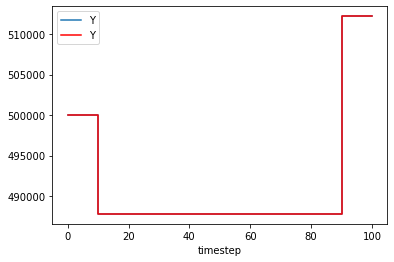

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='timestep',y='Y',ax=ax)
df.plot(kind='line',x='timestep',y='Y', color='red', ax=ax)

plt.show()

## Hydra World
### Risk Asset side of the Omnipool
### Quantities of the i-th risk asset, i-Shares and the price for i

The following command line creates three plots for the Hydra Omnipool (for the i-th asset on the risk side)

- the asset index can be set individually to `i`, `j`, etc.


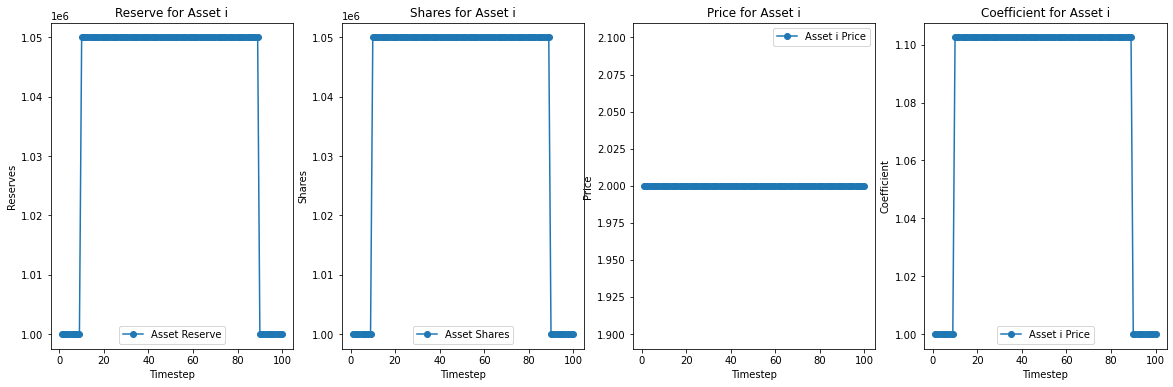

In [18]:
hydra_pool_plot(rdf,'Asset i Reserve and Shares', rdf.last_valid_index(),str('i'))

### Quantities of the j-th risk asset, j-Shares and the price for j

The following command line creates three plots for the Hydra Omnipool 

- the asset index can be set individually to `i`, `j`, etc.


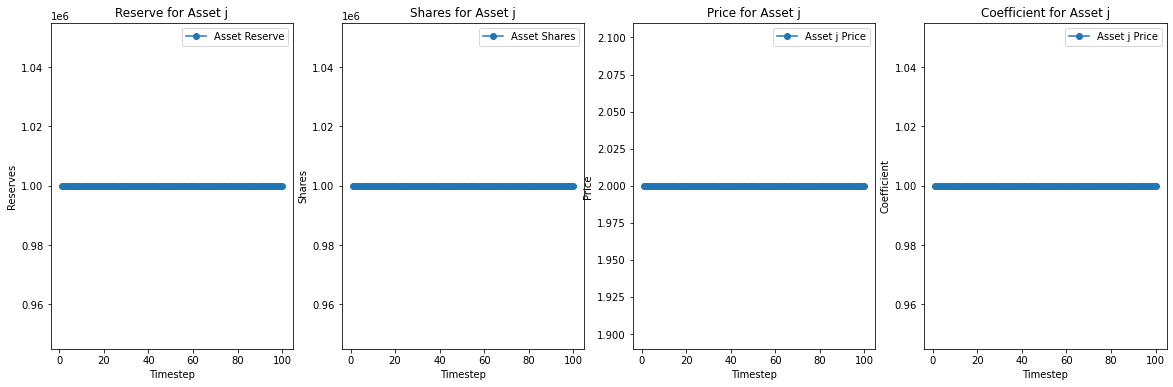

In [19]:
hydra_pool_plot(rdf,'Asset j Reserve and Shares', rdf.last_valid_index(),str('j'))

### Price comparison for assets on the risk side of the Omnipool

The following command lines create a plots for the Hydra Omnipool prices:
- Asset Base Prices
- Share to Reserve Ratio Base Prices
- Relative Asset Prices `i` to `j`    

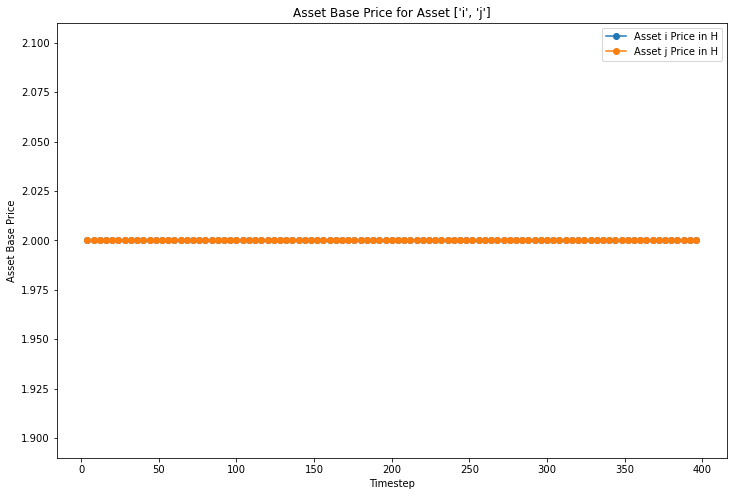

In [20]:
hydra_pool_price_plot(rdf,'Asset Base Price', rdf.last_valid_index(),['i', 'j'])

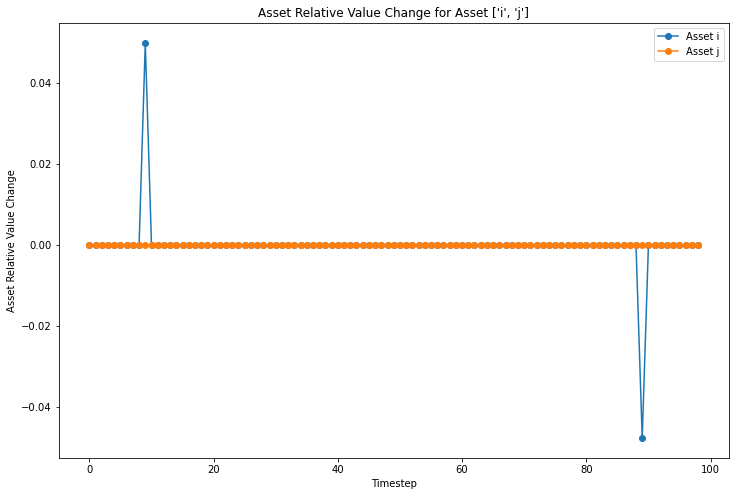

In [21]:
relative_value_plot(rdf,'Asset Relative Value Change', rdf.last_valid_index(),['i', 'j'])

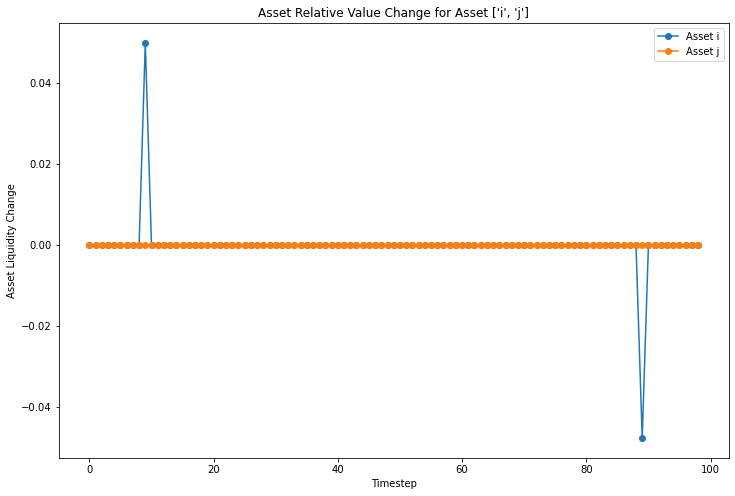

In [22]:
relative_liq_plot(rdf,'Asset Relative Value Change', rdf.last_valid_index(),['i', 'j'])

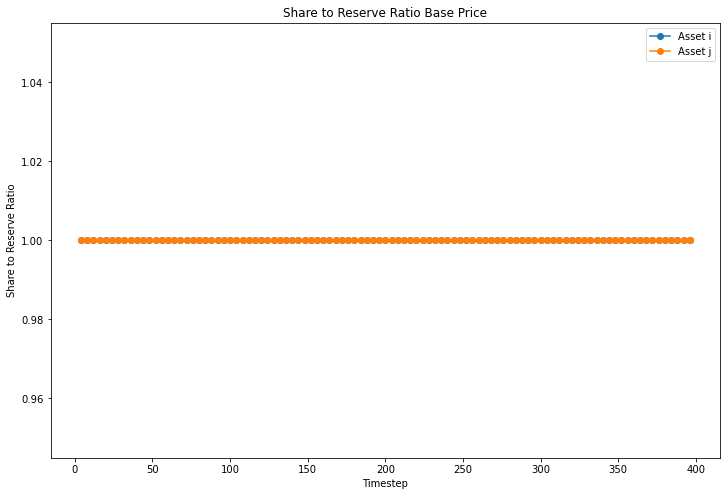

In [23]:
trade_liq_plot(rdf,'Share to Reserve Ratio Base Price', rdf.last_valid_index(),['i', 'j'])

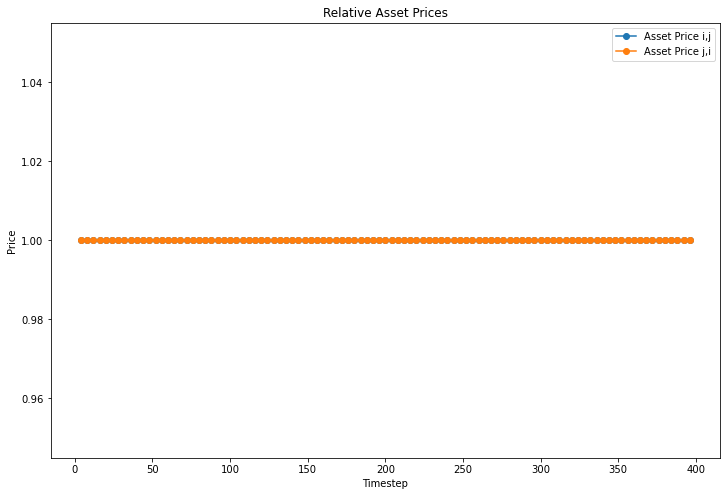

In [24]:
rel_price_plot(rdf,'Relative Asset Prices', rdf.last_valid_index(),['i', 'j'])


# Agents and their Local State Variables

The following section tracks the development for the agent states.
As every agent is defined to be responsible for a different action and all agent states are shown this section can be used to assess 
- the intentional changes in the local states directly affected by the actions, and
- the unintentional changes in local states of other agents who are indirectly affected

All agents carry the following local states:

| Symbol | Name | Definition  | Domain |   | Unit
| -------- | -------- | -------- | -------- | -------- | --------|
| $\mathbf{r}^j$     | Reserve Assets     | Reserve Assets are quantities of privately held risk assets by liquidity provider agent $j$ which are not (yet) related to the Liquidity Pool. |  $\mathbb{R}_{+}^{n}$| | BTC, ETH, DOT,...; an amount in real non-negative numbers denoted in the respective currency unit
| $h^j$     | Base Asset     | Total Base Asset (HDX) amount of $H$ held by agent $j$. |  $\mathbb{R}_{+}$| | a real non-negative amount of HDX |
| $\mathbf{s}^j$     | Risk Asset Shares     | Risk Asset Share as value of liquidity provider agent $j$'s contribution of risk asset(s) to the Liquidity Pool, minted and distributed (as a claim) to agent $j$ at the time of introduction into the Pool.| $\mathbb{R}_{+}^{n}$  | |a vector of amounts in real non-negative numbers
| $s^{qj}$     | Base Asset Share     | Base Asset (HDX) share as value of liquidity provider agent $j$'s contribution of HDX to the Liquidity Pool,  minted and distributed to agent $j$ (as a claim) at the time of introduction into the Pool.| $\mathbb{R}_{+}$  | |a real non-negative number

To locate specific values in the dataframe the commands
- `first_valid_index()`
- `first_valid_index()*x`
- `last_valid_index()`

can be used.


## Uniswap World
Results for the copy of the agents going through the Hydra world are saved in `uni_agents`

In [25]:
rdf['uni_agents'][rdf.first_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100000.00,110000.00,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
rdf['uni_agents'][rdf.first_valid_index()*20]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,50000.00,160000.00,40000.00,270000.00,500.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
rdf['uni_agents'][rdf.last_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100000.00,110000.00,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Hydra World

Results for the copy of the agents going through the Hydra world are saved in `hydra_agents`


In [28]:
rdf['hydra_agents'][rdf.first_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100000.00,110000.00,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
rdf['hydra_agents'][rdf.first_valid_index()*12]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,50000.00,160000.00,140000.00,170000.00,50000.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
rdf['hydra_agents'][rdf.last_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100000.00,110000.00,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Agent Token Holdings - Uniswap World


The following command line creates eight plots, one for each agent individually, showing his token holdings 

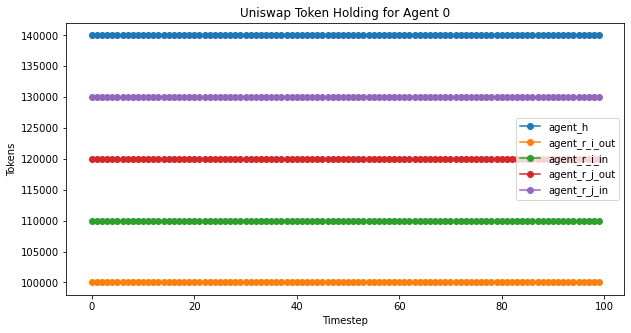

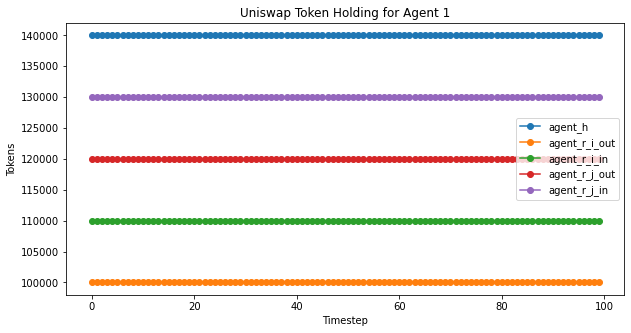

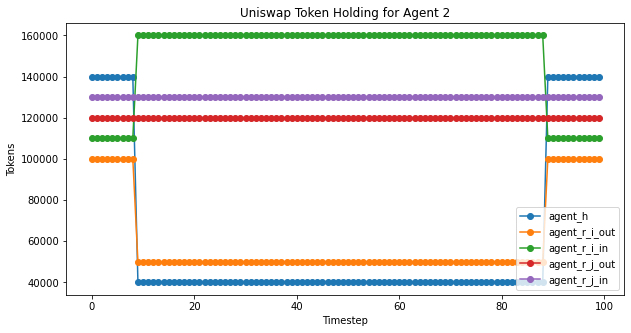

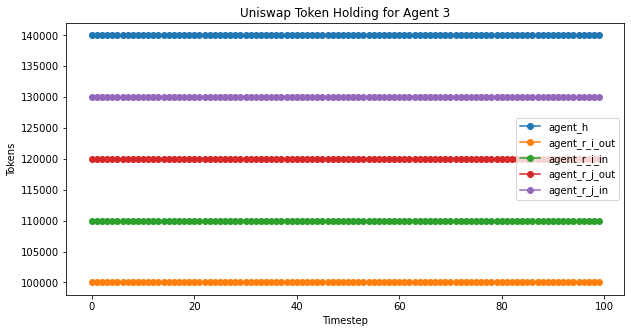

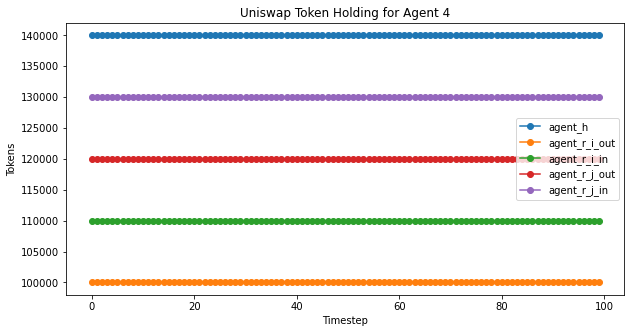

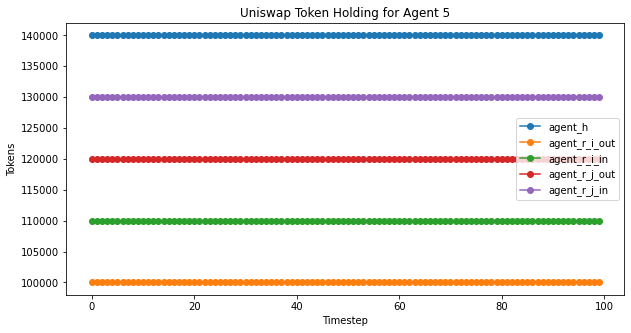

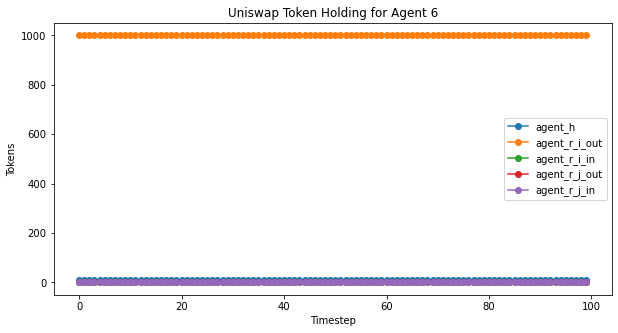

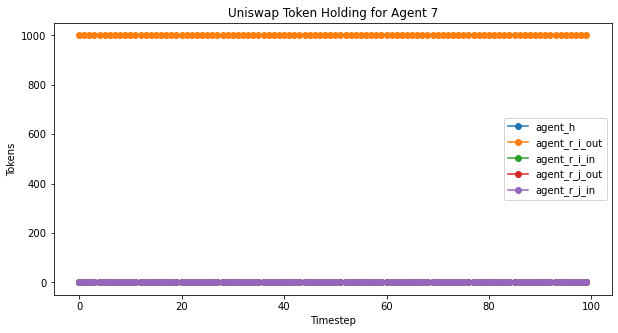

In [31]:
agent_plot(rdf,'Uniswap Token Holding for Agent ', len(rdf['timestep'])) #,4,'j')

## Agent Values - Uniswap World

The following command line creates eight plots, one for each agents showing his values. These are the token holdings multiplied by price.

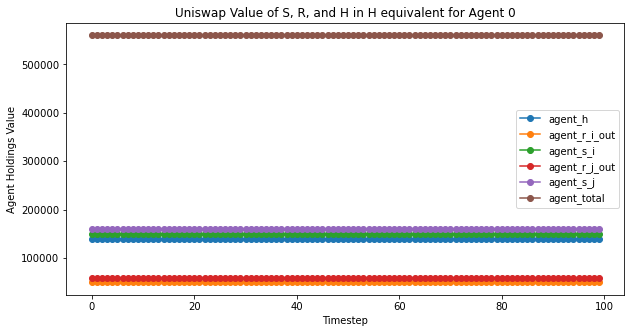

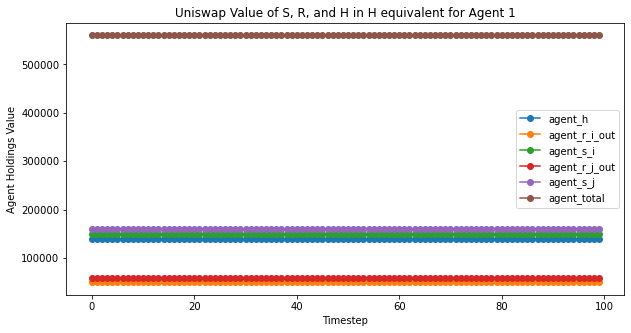

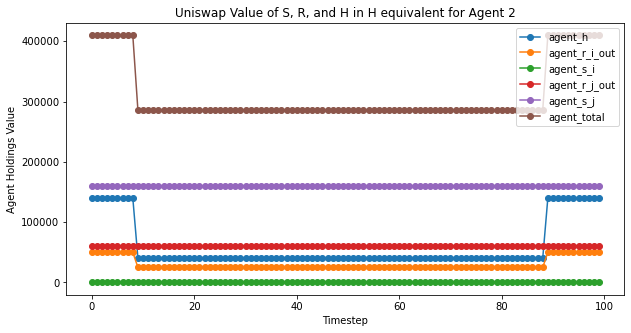

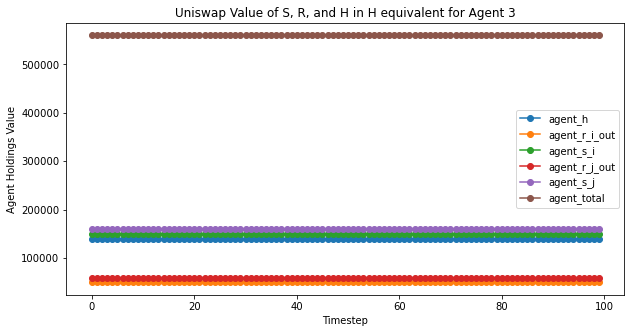

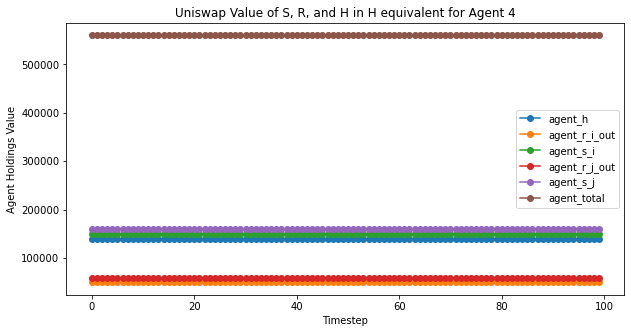

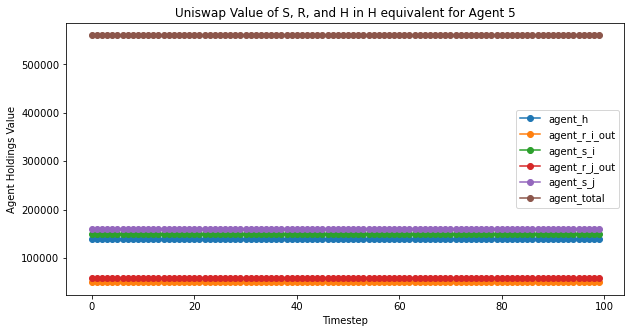

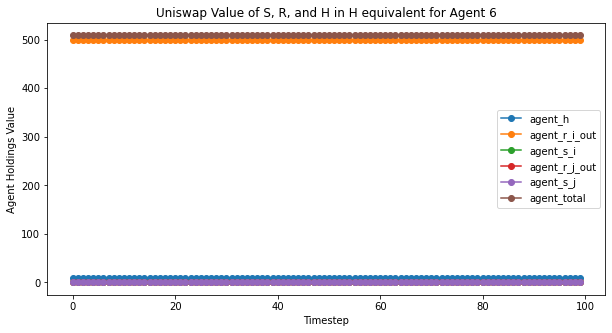

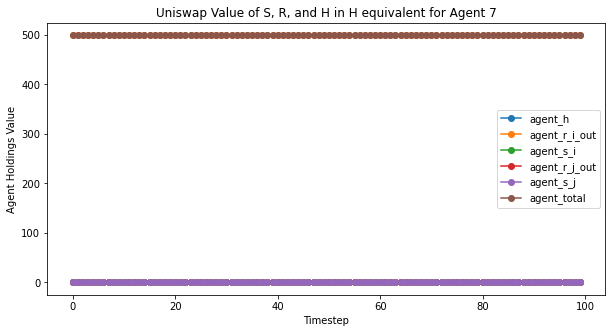

In [32]:
agent_value_plot(rdf,'Uniswap Value of S, R, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

## Agent Token Holdings - Hydra World

The following command line creates eight plots, one for each agents indivudially, showing his token holdings


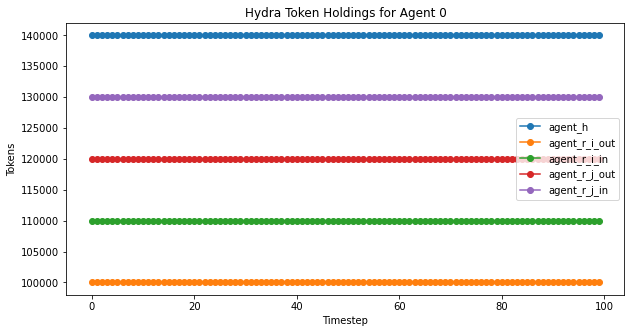

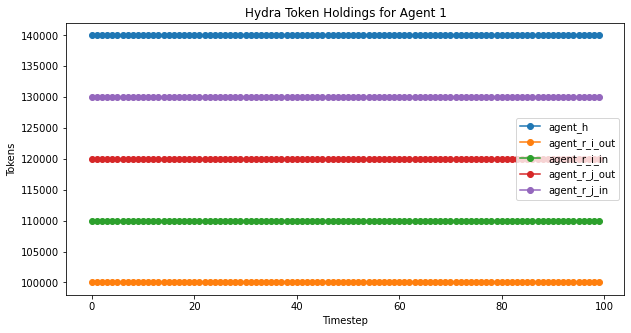

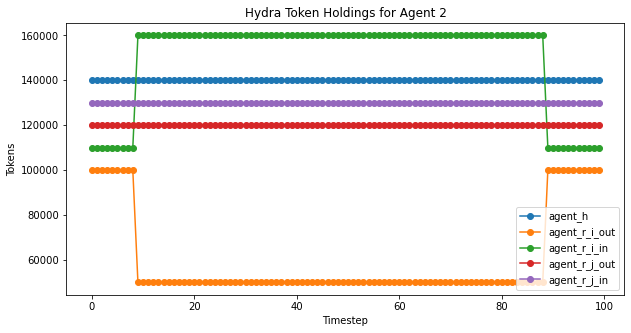

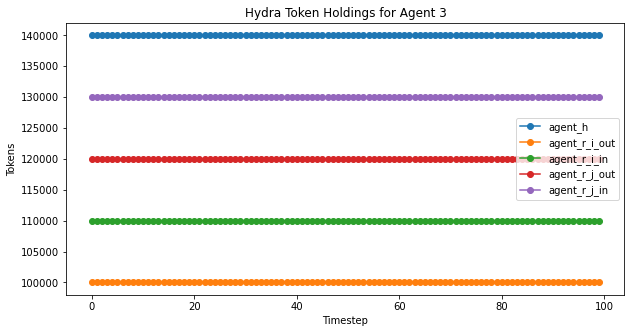

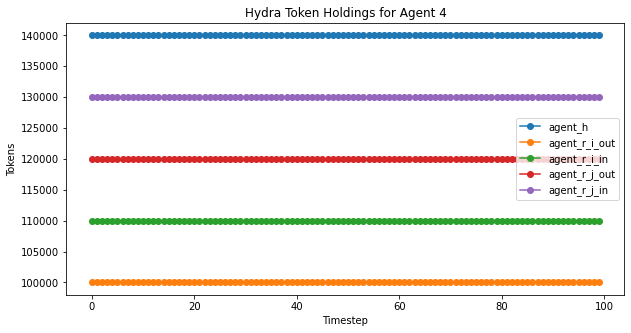

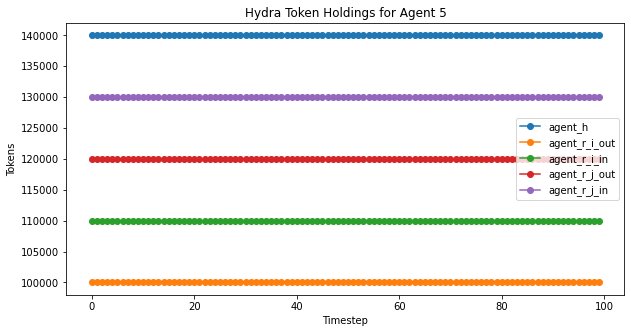

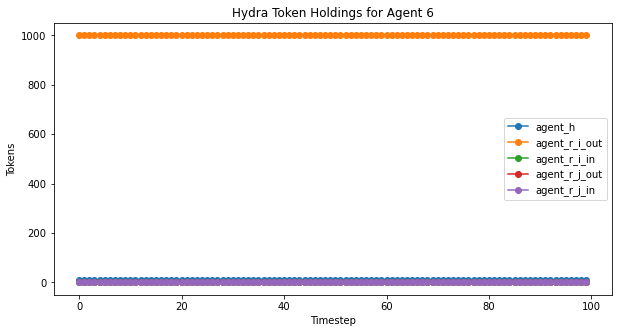

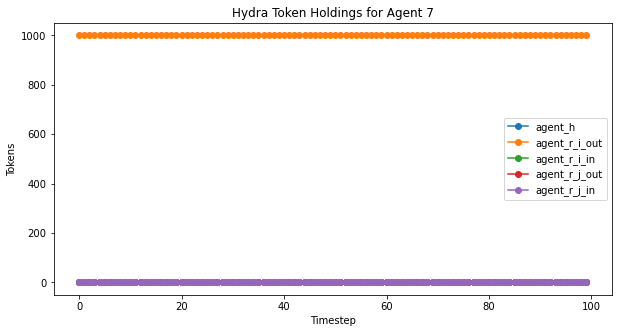

In [33]:
hydra_agent_plot(rdf,'Hydra Token Holdings for Agent ', len(rdf['timestep']))

## Agent Values - Hydra World

The following command line creates eight plots, one for each agents showing his values. These are the token holdings multiplied by price.


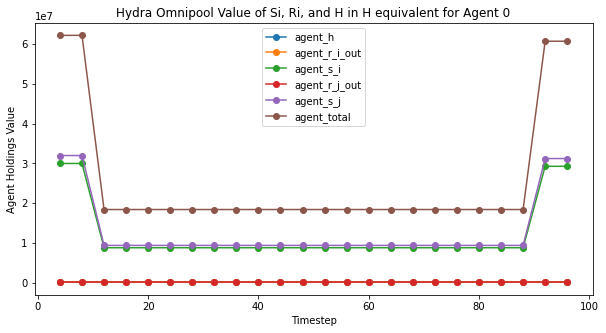

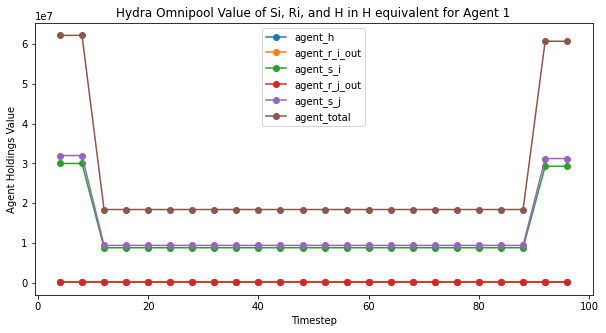

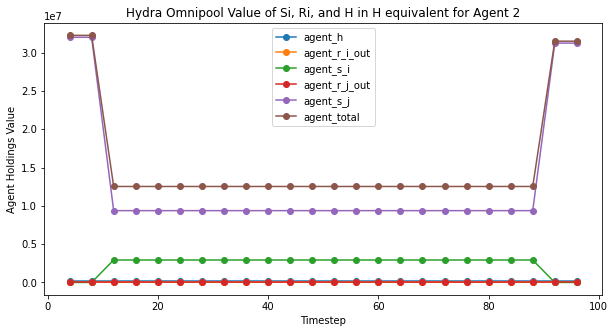

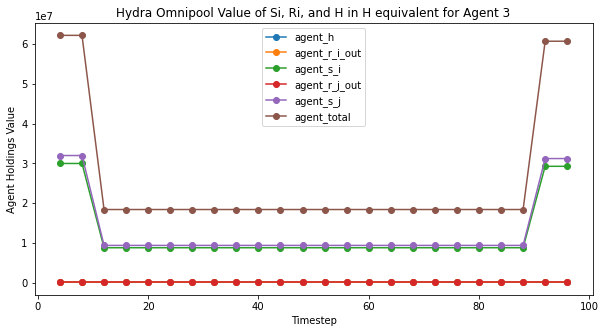

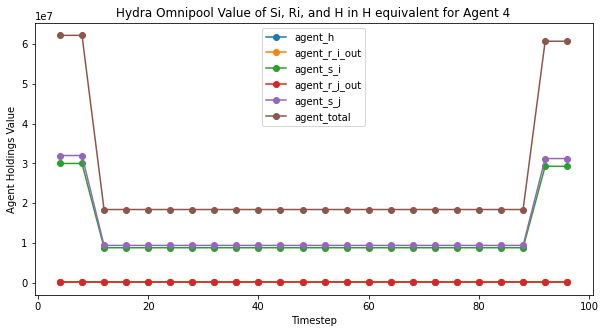

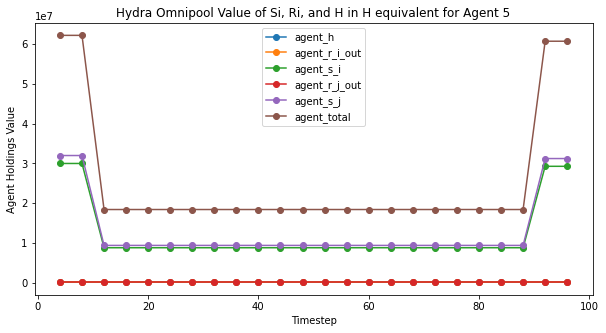

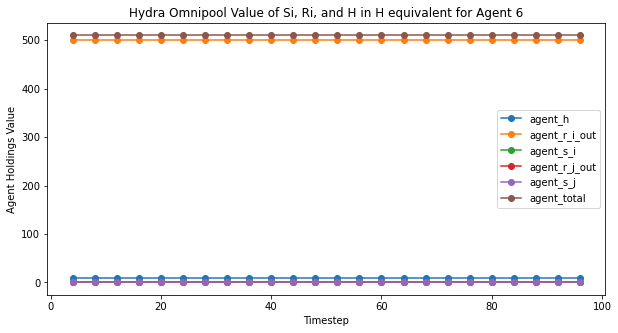

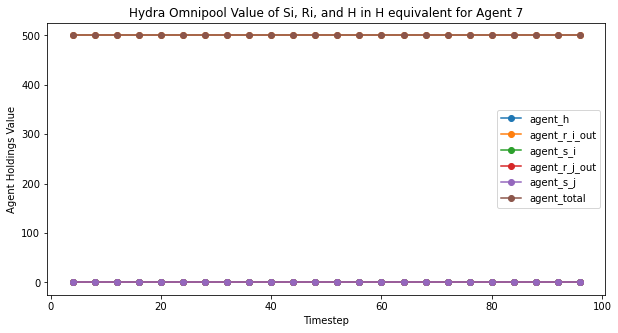

In [34]:
hydra_agent_value_plot(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

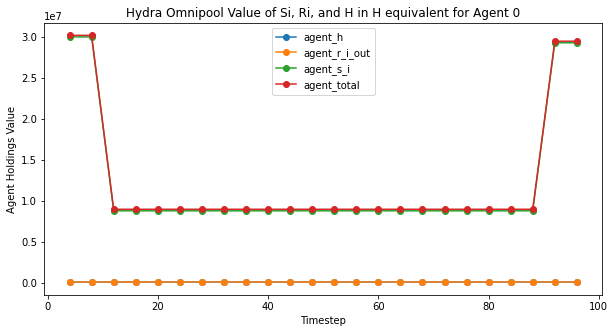

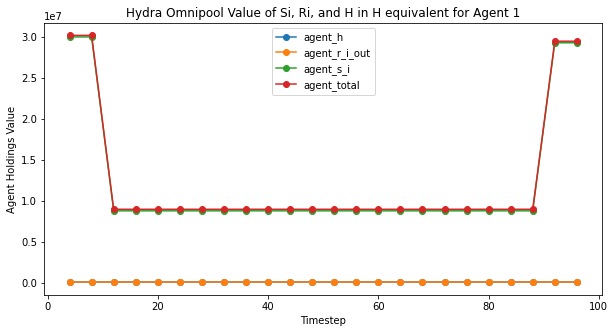

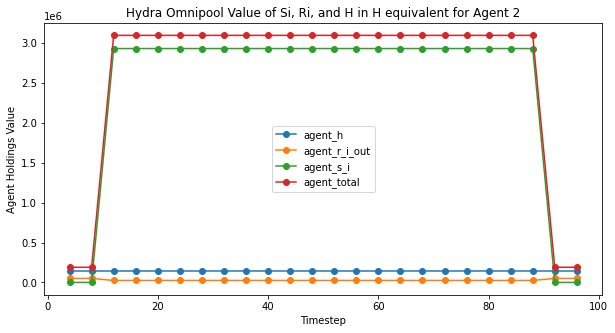

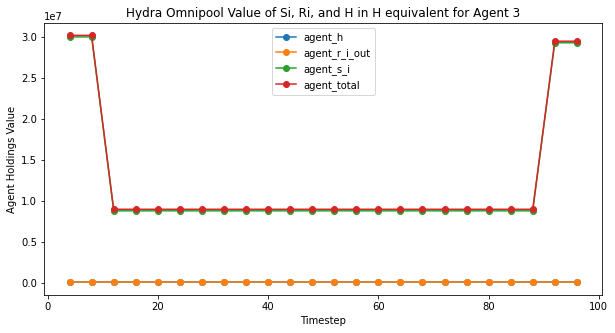

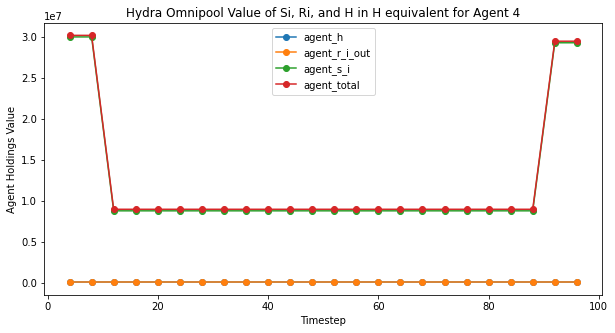

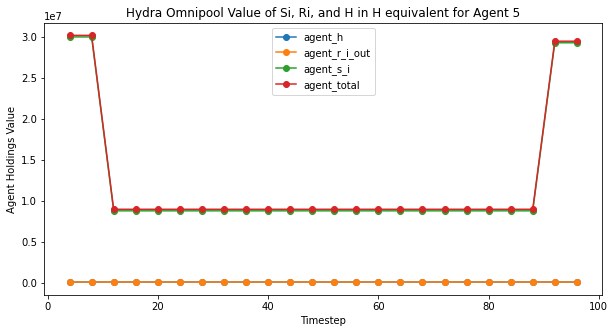

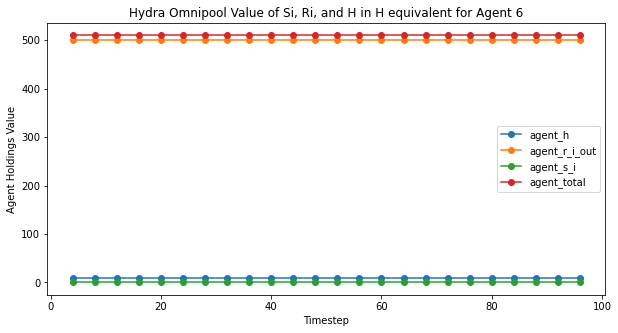

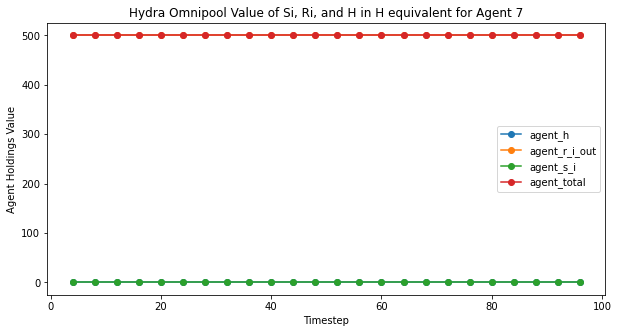

In [35]:
hydra_agent_value_plot_rev(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')